In [31]:
import pandas as pd
import numpy as np
import joblib as jb
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [15]:
data= pd.read_csv('datasets/Wednesday_cleaned.csv')

In [13]:
data[' Label'].value_counts()


 Label
1.0    193745
Name: count, dtype: int64

In [16]:
# Prepare features and label
X = data.drop(' Label', axis=1)
y = data[' Label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
assert not X_train.equals(X_test)

In [18]:
print("Train label distribution:\n", y_train.value_counts(normalize=True))
print("Test label distribution:\n", y_test.value_counts(normalize=True))

Train label distribution:
  Label
0    0.682635
1    0.317365
Name: proportion, dtype: float64
Test label distribution:
  Label
0    0.682638
1    0.317362
Name: proportion, dtype: float64


In [19]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)
rf.fit(X_train, y_train)
print("Train Accuracy:", rf.score(X_train, y_train))
print("Test Accuracy:", rf.score(X_test, y_test))

Train Accuracy: 0.9985196075219499
Test Accuracy: 0.9985339525131658


In [20]:
y_pred = rf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     83348
           1       1.00      1.00      1.00     38749

    accuracy                           1.00    122097
   macro avg       1.00      1.00      1.00    122097
weighted avg       1.00      1.00      1.00    122097



In [21]:
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.92021917 0.99791148 0.99888612 0.99945125 0.90631143]
Mean CV Accuracy: 0.9645558900878489


In [22]:
importances = rf.feature_importances_
features = X.columns
sorted_idx = importances.argsort()

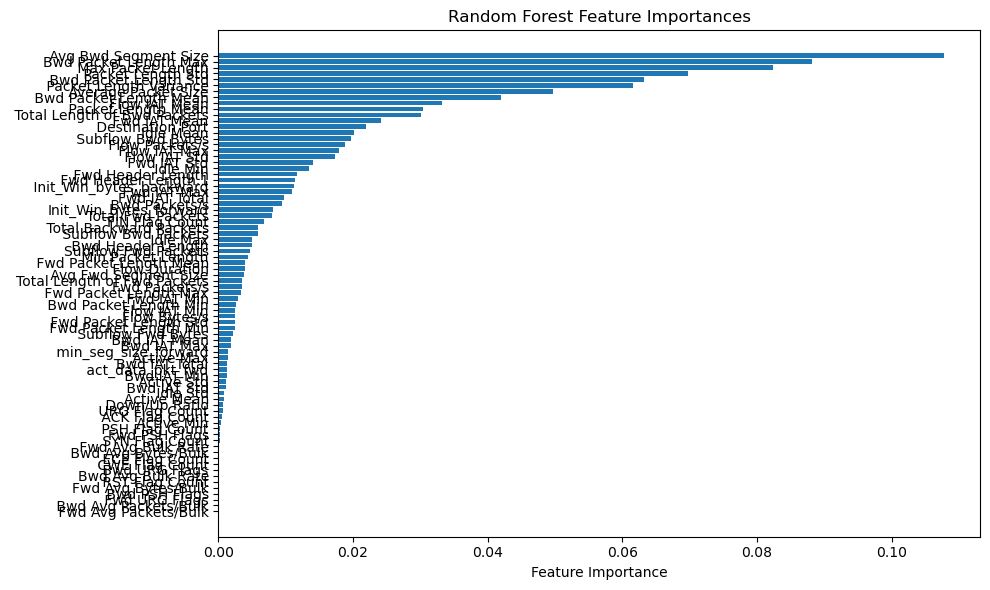

In [29]:
plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

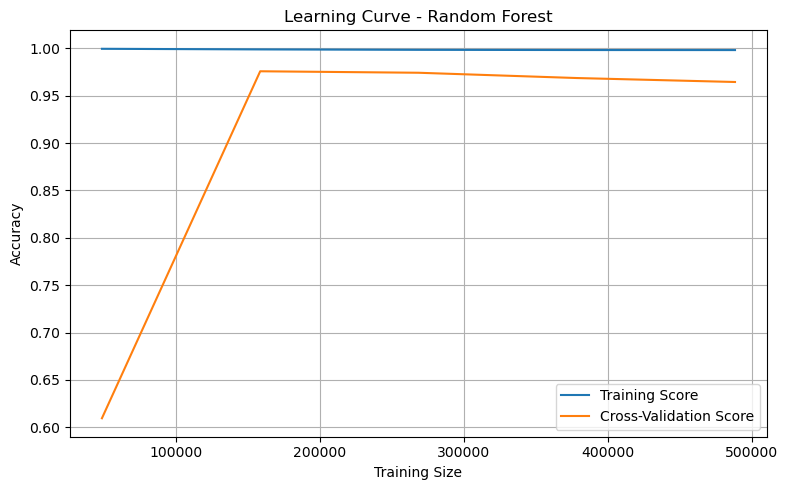

In [30]:
train_sizes, train_scores, test_scores = learning_curve(
    rf, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
jb.dump(rf, 'rf_model.joblib')

['rf_model.joblib']